# Name: Deep Walke
# BT19CSE122

Q.1 Suppose that the communication among the group of n people in a society is represented by the graph, 
where vertices represent the persons and the edges represent the distance (communication link distance) 
between two end vertices. Write a program to perform the following operations on given dataset:

(a) Compute the complete connected graph (all persons are connected to each other )

(b) Compute the sparse graph (every person is connected to only three members of the society).

(c) Print the adjacent neighbors of every person in the computed graph (b).

(d) Let us assume that the distance between every pair of nodes in the graph (b) is the same. Perform the depth first search on graph (b).

In [26]:
# comments
# in dataset entry 25th and 28th are same

In [27]:
import matplotlib.pyplot as plt 
import csv

In [28]:
filename='/Users/deepwalke/Documents/deep/8th sem/Graph Theory/Assignment1/Assignment1_dataset.csv'
fields=[]
rows=[]

# reading csv file
with open(filename,'r') as csvfile:
  csvreader=csv.reader(csvfile)
  fields=next(csvreader)
  for row in csvreader:
        rows.append(row)
  print("Total no. of rows: %d"%(csvreader.line_num))

x=[]
y=[]
for row in rows[:]:
    # parsing each column of a row and also converting it into float
    x.append(float(row[0]))
    y.append(float(row[1]))

Total no. of rows: 36


In [29]:
# a dictionary to store coordinates
# basically means that each coordinate will have a unique index number
# and cordinates[index] will give the coordinates
coordinates = {}
for i in range(len(x)):
  coordinates[i]=(x[i],y[i])
# print(coordinates)

# adjacency matrix
# considering adjacency matrix for complete graph
adjacency_matrix = [[0 for i in range(len(x))] for j in range(len(x))]
for i in range(len(x)):
  for j in range(len(x)):
    if i!=j:
      d=((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5
      adjacency_matrix[i][j]=(d,coordinates[i],coordinates[j])
    else:
      adjacency_matrix[i][j]=(0,coordinates[i],coordinates[j])

print("Adjaceny matrix for Complete Graph")
for i in range(len(x)):
  print(adjacency_matrix[i])


Adjaceny matrix for Complete Graph
[(0, (1.0, 1.0), (1.0, 1.0)), (0.14142135623730964, (1.0, 1.0), (1.1, 1.1)), (0.28284271247461895, (1.0, 1.0), (1.2, 1.2)), (0.22360679774997896, (1.0, 1.0), (1.2, 1.1)), (0.22360679774997896, (1.0, 1.0), (1.1, 1.2)), (0.10000000000000009, (1.0, 1.0), (1.0, 1.1)), (0.10000000000000009, (1.0, 1.0), (1.1, 1.0)), (0.19999999999999996, (1.0, 1.0), (1.2, 1.0)), (0.19999999999999996, (1.0, 1.0), (1.0, 1.2)), (0.316227766016838, (1.0, 1.0), (1.1, 1.3)), (0.316227766016838, (1.0, 1.0), (1.3, 1.1)), (0.36055512754639896, (1.0, 1.0), (1.3, 1.2)), (0.30000000000000004, (1.0, 1.0), (1.0, 1.3)), (0.5656854249492379, (1.0, 1.0), (1.4, 1.4)), (0.8485281374238571, (1.0, 1.0), (1.6, 1.6)), (0.7071067811865476, (1.0, 1.0), (1.5, 1.5)), (0.6403124237432848, (1.0, 1.0), (1.4, 1.5)), (0.7211102550927979, (1.0, 1.0), (1.6, 1.4)), (0.9219544457292888, (1.0, 1.0), (1.7, 1.6)), (0.9899494936611665, (1.0, 1.0), (1.7, 1.7)), (1.1313708498984762, (1.0, 1.0), (1.8, 1.8)), (1.0630

# (a) Compute the complete connected graph (all persons are connected to each other )


In [30]:
def complete_graph(x,y):
  plt.title('Complete Graph')
  for i in range(len(x)):
    for j in range(len(x)):
        if i!=j:
            xx=[x[i],x[j]]
            yy=[y[i],y[j]]
            plt.plot(xx,yy,'o',color='black')
            plt.plot(xx,yy,color='red',linewidth=0.03)
plt.show()

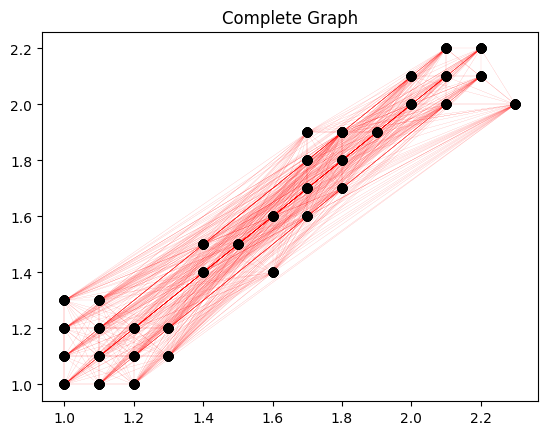

In [31]:
#  plotting complete graph
complete_graph(x,y)


# (b) Compute the sparse graph (every person is connected to only three members of the society).

In [32]:
# for sparse graph we are usign adjacency list as matrix is too large and most of the entries are zero
# adjacency_list is a dictionary which stores the coordinates of the node and its neighbours and also the distance between them
adjacency_list={}

# sparse graph function plots the sparse graph and also stores the adjacency list with weight
def sparse_graph(x,y):
    for  i in range(len(x)):
        # to temporarily store the distances and coordinates of the node from all other nodes
        list=[]
        for j in range(len(x)):
            if i!=j:
                xx=[x[i],x[j]]
                yy=[y[i],y[j]]
                d=((xx[0]-xx[1])**2+(yy[0]-yy[1])**2)**0.5
                list.append((d,x[j],y[j]))
        
        # sorting the list in ascending order of distance to get top 3 least distances
        list.sort()
        # storing the coordinates of the node and its 3 neighbours in the dictionary this is the adjacency list with weight
        adjacency_list[x[i],y[i]]=list[:3]
        
        # plotting the lines between the node and its 3 neighbours
        for k in range(3):
            xx=[x[i],list[k][1]]
            yy=[y[i],list[k][2]]
            plt.plot(xx,yy,'o',color='black')
            plt.plot(xx,yy,color='blue')
    
    plt.title('Sparse Graph')
    plt.show()

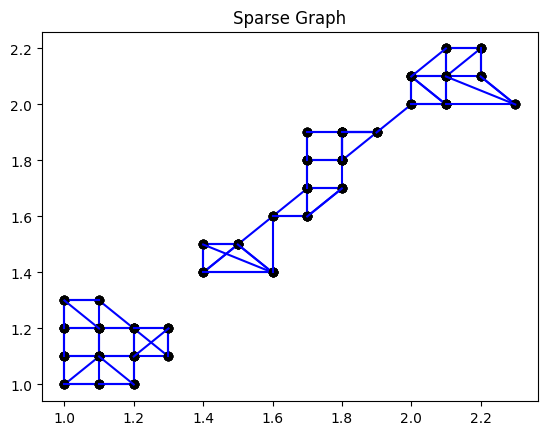

In [33]:
# plotting sparse graph
sparse_graph(x,y)


# (c) Print the adjacent neighbors of every person in the computed graph (b).


In [34]:
# here we need to consider only the coordnates of the node and its neighbours and not the distance
# function to print the neighbours of each node
def print_neighbours():
    for i in adjacency_list:
        print(i,end=" -> ")
        for j in adjacency_list[i]:
            print(j[1:],end=" ")
        print()

In [35]:
# printing the neighbours of each node
print_neighbours()

(1.0, 1.0) -> (1.0, 1.1) (1.1, 1.0) (1.1, 1.1) 
(1.1, 1.1) -> (1.1, 1.2) (1.2, 1.1) (1.0, 1.1) 
(1.2, 1.2) -> (1.1, 1.2) (1.2, 1.1) (1.3, 1.2) 
(1.2, 1.1) -> (1.1, 1.1) (1.2, 1.2) (1.2, 1.0) 
(1.1, 1.2) -> (1.1, 1.1) (1.2, 1.2) (1.0, 1.2) 
(1.0, 1.1) -> (1.0, 1.2) (1.0, 1.0) (1.1, 1.1) 
(1.1, 1.0) -> (1.2, 1.0) (1.0, 1.0) (1.1, 1.1) 
(1.2, 1.0) -> (1.1, 1.0) (1.2, 1.1) (1.1, 1.1) 
(1.0, 1.2) -> (1.0, 1.1) (1.0, 1.3) (1.1, 1.2) 
(1.1, 1.3) -> (1.0, 1.3) (1.1, 1.2) (1.2, 1.2) 
(1.3, 1.1) -> (1.3, 1.2) (1.2, 1.1) (1.2, 1.2) 
(1.3, 1.2) -> (1.3, 1.1) (1.2, 1.2) (1.2, 1.1) 
(1.0, 1.3) -> (1.0, 1.2) (1.1, 1.3) (1.1, 1.2) 
(1.4, 1.4) -> (1.4, 1.5) (1.5, 1.5) (1.6, 1.4) 
(1.6, 1.6) -> (1.7, 1.6) (1.7, 1.7) (1.5, 1.5) 
(1.5, 1.5) -> (1.4, 1.5) (1.4, 1.4) (1.6, 1.4) 
(1.4, 1.5) -> (1.4, 1.4) (1.5, 1.5) (1.6, 1.4) 
(1.6, 1.4) -> (1.5, 1.5) (1.4, 1.4) (1.6, 1.6) 
(1.7, 1.6) -> (1.6, 1.6) (1.7, 1.7) (1.8, 1.7) 
(1.7, 1.7) -> (1.7, 1.6) (1.7, 1.8) (1.8, 1.7) 
(1.8, 1.8) -> (1.8, 1.9) (1.8, 1.9) (1.7

# (d) Let us assume that the distance between every pair of nodes in the graph (b) is the same. Perform the depth first search on graph (b).

In [38]:
# as we are assuming that the distance between every nodes is same we dont consider distance attribute which is present in adjacency list

#visited list to keep track of the visited nodes 
visited=[]
def dfs(source):
    visited.append(source)
    for i in adjacency_list[source]:
        # if neighbour is not visited then call dfs on it
        if i[1:] not in visited:
            print(i[1:], end=" ")
            dfs(i[1:])
    

In [39]:
# count is used to count the number of connected components
components=0
# looping over all the coordinates and calling dfs on each node which is not in visited list
for i in range(len(x)):
    temp=x[i],y[i]
    if temp not in visited:
        print("Component ",components+1,":")
        dfs(temp)
        print()
        components+=1

print ("Total number of connected components: ",components)        

Component  1 :
(1.0, 1.1) (1.0, 1.2) (1.0, 1.3) (1.1, 1.3) (1.1, 1.2) (1.1, 1.1) (1.2, 1.1) (1.2, 1.2) (1.3, 1.2) (1.3, 1.1) (1.2, 1.0) (1.1, 1.0) 
Component  2 :
(1.4, 1.5) (1.5, 1.5) (1.6, 1.4) (1.6, 1.6) (1.7, 1.6) (1.7, 1.7) (1.7, 1.8) (1.7, 1.9) (1.8, 1.9) (1.8, 1.8) (1.9, 1.9) (1.8, 1.7) 
Component  3 :
(2.0, 2.1) (2.1, 2.1) (2.1, 2.0) (2.1, 2.2) (2.2, 2.2) (2.2, 2.1) (2.3, 2.0) 
Total number of connected components:  3
